In [1]:
#Agglomerative clustering
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p=['p1','p2','p3','p4','p5','p6']
l1=[0.40,0.22,0.35,0.26,0.08,0.45]
l2=[0.53,0.38,0.32,0.19,0.41,0.30]
df=pd.DataFrame(list(zip(p,l1,l2)),columns=['point','X','Y'])
df=df.set_index('point')
df

,X,Y
point,,
p1,0.40,0.53
p2,0.22,0.38
p3,0.35,0.32
p4,0.26,0.19
p5,0.08,0.41
p6,0.45,0.30


In [3]:
from scipy.spatial.distance import squareform, pdist
dist = pd.DataFrame(squareform(pdist(df[['X', 'Y']]), 'euclidean'), columns=df.index.values, index=df.index.values)
dist

,p1,p2,p3,p4,p5,p6
p1,0.000000,0.234307,0.215870,0.367696,0.341760,0.235372
p2,0.234307,0.000000,0.143178,0.194165,0.143178,0.243516
p3,0.215870,0.143178,0.000000,0.158114,0.284605,0.101980
p4,0.367696,0.194165,0.158114,0.000000,0.284253,0.219545
p5,0.341760,0.143178,0.284605,0.284253,0.000000,0.386005
p6,0.235372,0.243516,0.101980,0.219545,0.386005,0.000000


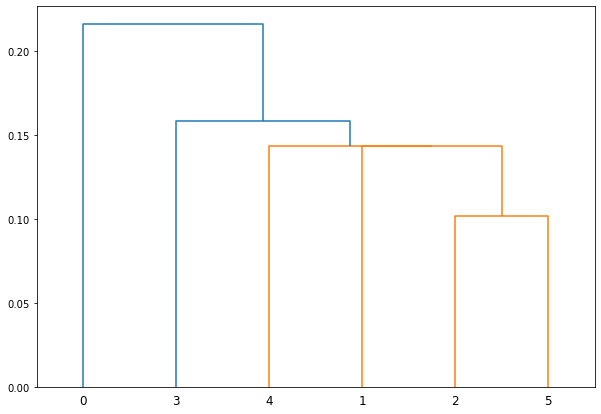

In [4]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendogram=sch.dendrogram(sch.linkage(df, method="single"))

In [5]:
#K-means clustering
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
l1=[185,170,168,179,182,188,180,180,183,180,180,177]
l2=[72,56,60,68,72,77,71,70,84,88,67,76]
data=pd.DataFrame(list(zip(l1,l2)),columns=['Height','Weight'])
data

,Height,Weight
0,185,72
1,170,56
2,168,60
3,179,68
4,182,72
5,188,77
6,180,71
7,180,70
8,183,84
9,180,88


,Height,Weight,class
0,185,72,0
1,170,56,2
2,168,60,2
3,179,68,0
4,182,72,0
5,188,77,1
6,180,71,0
7,180,70,0
8,183,84,1
9,180,88,1


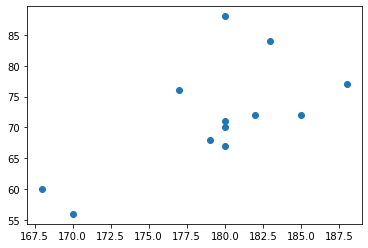

In [7]:
plt.scatter(data['Height'],data['Weight'])
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
pred=model.fit_predict(data[['Height','Weight']])
data['class']=pred
data

In [8]:
model.cluster_centers_
df1=data[data['class']==1]
df2=data[data['class']==0]
df3=data[data['class']==2]

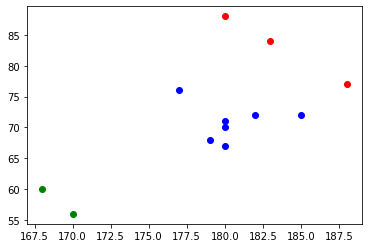

In [10]:
plt.scatter(df1['Height'],df1['Weight'],color='red')
plt.scatter(df2['Height'],df2['Weight'],color='blue')
plt.scatter(df3['Height'],df3['Weight'],color='green')


In [11]:
re=model.predict([[171,57]])
re

array([2])